In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OrdinalEncoder
import time

In [2]:
df = pd.read_csv("C:\\Users\\jigar\\OneDrive\\Desktop\\Courses\\ALY6020\\Nashville_housing_data_2013_2016.csv")

In [3]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,5,5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NaN,NASHVILLE,2013-01-04,93736,20130118-0006110,...,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0
6,6,6,119 10 0A 104.00,RESIDENTIAL CONDO,104 PRESCOTT PL,NaN,NASHVILLE,2013-01-07,64900,20130109-0002881,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,7,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,2013-01-15,44000,20130115-0004888,...,68100.0,84300.0,1216.00000,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0
8,8,8,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,2013-01-25,49900,20130128-0008950,...,68100.0,84300.0,1216.00000,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0
9,9,9,119 15 0 158.00,SINGLE FAMILY,113 NEESE DR,NaN,NASHVILLE,2013-01-09,25000,20130111-0003850,...,57100.0,88400.0,1152.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         56636 non-null  int64  
 1   Unnamed: 0.1                       56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636 non-null  obj

## Data Cleaning & Manipulation

In [5]:
# Dropping column 'Unnamed: 0' which has ids for each record.

df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])

In [6]:
#Dropping rows with more that 70% missing data
thresh = len(df.columns)*0.7
df1 = df.dropna(thresh=thresh)

In [7]:
# Checking for null values in each columns

for i in df1.columns:
    print(i, ':', df1[i].isnull().sum())

Parcel ID : 0
Land Use : 0
Property Address : 2
Suite/ Condo   # : 24275
Property City : 2
Sale Date : 0
Sale Price : 0
Legal Reference : 0
Sold As Vacant : 0
Multiple Parcels Involved in Sale : 0
Owner Name : 310
Address : 0
City : 0
State : 0
Acreage : 0
Tax District : 0
Neighborhood : 0
image : 63
Land Value : 0
Building Value : 0
Total Value : 0
Finished Area : 111
Foundation Type : 113
Year Built : 112
Exterior Wall : 112
Grade : 112
Bedrooms : 118
Full Bath : 5
Half Bath : 136


In [8]:
df1.shape

(24277, 29)

In [9]:
# Dropping column 'Suite/Condo' as it still has more that 90% values misisng

data = df1.drop(columns = ['Suite/ Condo   #'])

In [10]:
# Checking for unique values/Cardinality in each column

for i in data.columns:
    print(i, ':', df1[i].nunique())

Parcel ID : 20952
Land Use : 26
Property Address : 21780
Property City : 10
Sale Date : 1049
Sale Price : 3791
Legal Reference : 23952
Sold As Vacant : 2
Multiple Parcels Involved in Sale : 2
Owner Name : 19219
Address : 20946
City : 10
State : 1
Acreage : 440
Tax District : 7
Neighborhood : 195
image : 20895
Land Value : 970
Building Value : 4406
Total Value : 5668
Finished Area : 6117
Foundation Type : 6
Year Built : 126
Exterior Wall : 10
Grade : 20
Bedrooms : 12
Full Bath : 11
Half Bath : 4


In [11]:
#Removing categorical Variables with High Cardinality
df = data.drop(columns = ['Parcel ID','Property Address','Legal Reference','Owner Name','Address','image','State','City'])

In [12]:
# Checking for null values in each columns

for i in df.columns:
    print(i, ':', df[i].isnull().sum())

Land Use : 0
Property City : 2
Sale Date : 0
Sale Price : 0
Sold As Vacant : 0
Multiple Parcels Involved in Sale : 0
Acreage : 0
Tax District : 0
Neighborhood : 0
Land Value : 0
Building Value : 0
Total Value : 0
Finished Area : 111
Foundation Type : 113
Year Built : 112
Exterior Wall : 112
Grade : 112
Bedrooms : 118
Full Bath : 5
Half Bath : 136


In [13]:
# Filling the missing values in columns
df['Finished Area'] = df['Finished Area'].fillna(df['Finished Area'].mean())  #Replacing with mean.

df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].median()) # Replacing with median because bedrooms cannot be in decimal

df['Full Bath'] = df['Full Bath'].fillna(df['Full Bath'].median())

df['Half Bath'] = df['Half Bath'].fillna(df['Half Bath'].median())

df['Year Built'] = df['Year Built'].fillna(df['Year Built'].median())

In [14]:
#Filling the Missing Value in Categorical Variable with Most A=Occuring Category

In [15]:
df['Property City'].value_counts()

NASHVILLE         19176
ANTIOCH            1285
MADISON            1232
HERMITAGE          1026
OLD HICKORY         868
GOODLETTSVILLE      462
BRENTWOOD           188
WHITES CREEK         20
JOELTON              11
MOUNT JULIET          7
Name: Property City, dtype: int64

In [16]:
df['Property City'] = df['Property City'].fillna('NASHVILLE')

In [17]:
df['Foundation Type'].value_counts()

CRAWL        15389
FULL BSMT     3917
PT BSMT       3200
SLAB          1581
TYPICAL         40
PIERS           37
Name: Foundation Type, dtype: int64

In [18]:
df['Foundation Type'] = df['Foundation Type'].fillna('CRAWL')

In [19]:
df['Grade'].value_counts()

C       17262
B        3698
D        1984
A         598
X         523
E          60
TCC        20
AAC         3
AAB         3
IDC         3
OFC         2
TAC         1
SSC         1
SRD         1
OFB         1
OMB         1
SRC         1
TCD         1
TFC         1
TCB         1
Name: Grade, dtype: int64

In [20]:
df['Grade'] = df['Grade'].fillna('C')

In [21]:
df['Exterior Wall'].value_counts()

BRICK           11942
FRAME            8870
BRICK/FRAME      2602
STONE             331
STUCCO            168
CONC BLK          113
FRAME/STONE       108
LOG                15
METAL              15
PRECAST CONC        1
Name: Exterior Wall, dtype: int64

In [22]:
df['Exterior Wall'] = df['Exterior Wall'].fillna('BRICK')

In [23]:
# Checking for null values in each columns

for i in df.columns:
    print(i, ':', df[i].isnull().sum())

Land Use : 0
Property City : 0
Sale Date : 0
Sale Price : 0
Sold As Vacant : 0
Multiple Parcels Involved in Sale : 0
Acreage : 0
Tax District : 0
Neighborhood : 0
Land Value : 0
Building Value : 0
Total Value : 0
Finished Area : 0
Foundation Type : 0
Year Built : 0
Exterior Wall : 0
Grade : 0
Bedrooms : 0
Full Bath : 0
Half Bath : 0


In [24]:
df.describe()

,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Year Built,Bedrooms,Full Bath,Half Bath
count,2.427700e+04,24277.000000,24277.000000,2.427700e+04,2.427700e+04,2.427700e+04,24277.000000,24277.000000,24277.000000,24277.000000,24277.000000
mean,2.760655e+05,0.461978,4425.296824,6.944655e+04,1.723276e+05,2.444474e+05,1926.954345,1963.731927,3.089591,1.886518,0.282448
std,3.143324e+05,0.894009,2144.274471,1.031534e+05,2.093971e+05,2.847463e+05,1683.156021,26.486052,0.850890,0.961192,0.487031
min,1.000000e+02,0.040000,107.000000,1.000000e+02,0.000000e+00,7.500000e+03,0.000000,1799.000000,0.000000,0.000000,0.000000
25%,1.250000e+05,0.190000,3130.000000,2.160000e+04,8.320000e+04,1.094000e+05,1241.000000,1948.000000,3.000000,1.000000,0.000000
50%,1.850000e+05,0.270000,4026.000000,2.990000e+04,1.170000e+05,1.545000e+05,1636.000000,1960.000000,3.000000,2.000000,0.000000
75%,3.250000e+05,0.450000,6229.000000,6.030000e+04,1.888000e+05,2.782000e+05,2210.000000,1983.000000,3.000000,2.000000,1.000000
max,1.235000e+07,51.340000,9530.000000,1.869000e+06,1.297180e+07,1.394040e+07,197988.000000,2017.000000,11.000000,10.000000,3.000000


In [25]:
#Feature Engineering

In [26]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df['Sale Year'] = pd.DatetimeIndex(df['Sale Date']).year
df['Sale Month'] = pd.DatetimeIndex(df['Sale Date']).month
df = df.drop(columns = ['Sale Date'])

In [27]:
df['House Age'] = df['Sale Year'] - df['Year Built']

In [28]:
df.head(5)

,Land Use,Property City,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,Land Value,Building Value,...,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Sale Year,Sale Month,House Age
1,SINGLE FAMILY,NASHVILLE,191500,No,No,0.17,URBAN SERVICES DISTRICT,3127.0,32000.0,134400.0,...,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0,2013,1,72.0
2,SINGLE FAMILY,NASHVILLE,202000,No,No,0.11,CITY OF BERRY HILL,9126.0,34000.0,157800.0,...,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0,2013,1,13.0
3,SINGLE FAMILY,NASHVILLE,32000,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,243700.0,...,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0,2013,1,65.0
4,SINGLE FAMILY,NASHVILLE,102000,No,No,0.34,URBAN SERVICES DISTRICT,3130.0,25000.0,138100.0,...,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0,2013,1,103.0
5,SINGLE FAMILY,NASHVILLE,93736,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,25000.0,86100.0,...,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0,2013,1,68.0


In [29]:
# Exploratory Data Analysis

<AxesSubplot:xlabel='Sale Month', ylabel='count'>

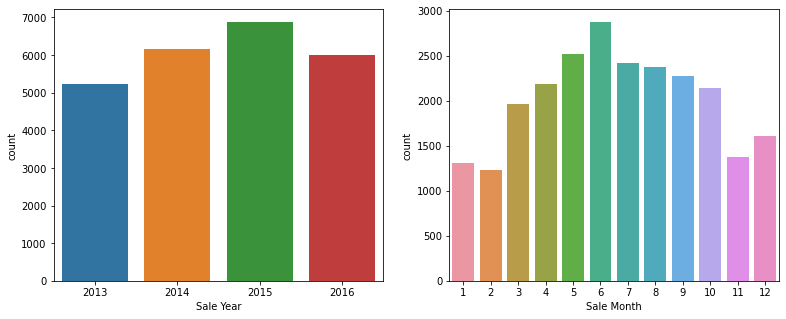

In [30]:
fig, (axis1, axis2) = plt.subplots(1,2, figsize=(13,5))
sns.countplot(x='Sale Year', data=df, ax = axis1)
sns.countplot(x='Sale Month', data=df, ax = axis2)

<AxesSubplot:xlabel='Sale Year'>

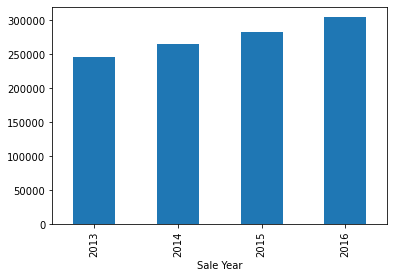

In [31]:
#Understanding the mean Sale Price over the Years
df.groupby(['Sale Year'])['Sale Price'].mean().plot.bar()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24277 entries, 1 to 56616
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Land Use                           24277 non-null  object 
 1   Property City                      24277 non-null  object 
 2   Sale Price                         24277 non-null  int64  
 3   Sold As Vacant                     24277 non-null  object 
 4   Multiple Parcels Involved in Sale  24277 non-null  object 
 5   Acreage                            24277 non-null  float64
 6   Tax District                       24277 non-null  object 
 7   Neighborhood                       24277 non-null  float64
 8   Land Value                         24277 non-null  float64
 9   Building Value                     24277 non-null  float64
 10  Total Value                        24277 non-null  float64
 11  Finished Area                      24277 non-null  flo

In [33]:
# Encoding Categorical Variables

In [34]:
for i in df.columns:
    print(i, ':', df[i].nunique())

Land Use : 26
Property City : 10
Sale Price : 3791
Sold As Vacant : 2
Multiple Parcels Involved in Sale : 2
Acreage : 440
Tax District : 7
Neighborhood : 195
Land Value : 970
Building Value : 4406
Total Value : 5668
Finished Area : 6118
Foundation Type : 6
Year Built : 126
Exterior Wall : 10
Grade : 21
Bedrooms : 12
Full Bath : 11
Half Bath : 4
Sale Year : 4
Sale Month : 12
House Age : 129


In [35]:
def assign_grade(row):
    if row == 'A':
        result = 1
    elif row == 'B':
        result = 2
    elif row == 'C':
        result = 3
    elif row == 'D':
        result = 4
    elif row == 'E':
        result = 5
    else:
        result = 6
    return result

In [36]:
df['Grade'] = df['Grade'].apply(assign_grade)

In [37]:
df1 = pd.get_dummies(df, columns = ['Property City','Sold As Vacant', 'Multiple Parcels Involved in Sale','Land Use','Tax District','Foundation Type', 'Exterior Wall'])

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24277 entries, 1 to 56616
Data columns (total 78 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Sale Price                                       24277 non-null  int64  
 1   Acreage                                          24277 non-null  float64
 2   Neighborhood                                     24277 non-null  float64
 3   Land Value                                       24277 non-null  float64
 4   Building Value                                   24277 non-null  float64
 5   Total Value                                      24277 non-null  float64
 6   Finished Area                                    24277 non-null  float64
 7   Year Built                                       24277 non-null  float64
 8   Grade                                            24277 non-null  int64  
 9   Bedrooms                    

In [39]:
Y = df1['Sale Price']

X = df1.drop('Sale Price', axis = 1)

## Linear Regression Model

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

In [41]:
import statsmodels.api as sm
def get_stats():
    results = sm.OLS(Y_train, X_train).fit()
    print(results.summary())
get_stats()

                            OLS Regression Results                            
Dep. Variable:             Sale Price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1088.
Date:                Mon, 20 Jun 2022   Prob (F-statistic):               0.00
Time:                        21:11:23   Log-Likelihood:            -2.5746e+05
No. Observations:               19421   AIC:                         5.151e+05
Df Residuals:                   19351   BIC:                         5.156e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [42]:
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)

y_pred = linear_model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy = " , round((linear_model.score(X_test, Y_test)*100),3), '%')

Accuracy =  58.414 %


In [44]:
#Converting Linar Target to Binary Target For Classification Model

In [45]:
# Good Property means above averge value and Bad Property means below average Value

In [46]:
df1['Absolute Value'] = df1['Sale Price'] - df1['Total Value']
status_mean = df1['Absolute Value'].mean()
df1.loc[df1['Absolute Value'] < status_mean, ('Absolute Value')] = 0
df1.loc[df1['Absolute Value'] >= status_mean, ('Absolute Value')] = 1

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24277 entries, 1 to 56616
Data columns (total 79 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Sale Price                                       24277 non-null  int64  
 1   Acreage                                          24277 non-null  float64
 2   Neighborhood                                     24277 non-null  float64
 3   Land Value                                       24277 non-null  float64
 4   Building Value                                   24277 non-null  float64
 5   Total Value                                      24277 non-null  float64
 6   Finished Area                                    24277 non-null  float64
 7   Year Built                                       24277 non-null  float64
 8   Grade                                            24277 non-null  int64  
 9   Bedrooms                    

In [82]:
df2 = df1.drop(columns = ['Sale Price','Total Value','Building Value','Land Value'])

## Decision Tree Model 

In [83]:
Y = df2['Absolute Value']

X = df2.drop('Absolute Value',axis = 1)

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 10, test_size = 0.2)

In [85]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Tree algorithm
from sklearn.tree import plot_tree  # Tree plotting

In [137]:
model_decision_tree = DecisionTreeClassifier(random_state = 100, max_depth = 7)
model_decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7, random_state=100)

In [141]:
model_decision_tree.score(X_train, Y_train)

0.737346171669842

In [142]:
model_decision_tree.score(X_test, Y_test)

0.7372322899505767

In [139]:
y_pred_dt = model_decision_tree.predict(X_test)

In [135]:
confusion_matrix(Y_test, y_pred_dt)

array([[1956,  657],
       [ 645, 1598]], dtype=int64)

In [136]:
print("Precision: ", precision_score(Y_test, y_pred_dt))
print("Recall: ", recall_score(Y_test, y_pred_dt))

Precision:  0.7086474501108647
Recall:  0.7124386981720909


In [93]:
print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.70      0.71      0.71      2613
         1.0       0.66      0.65      0.65      2243

    accuracy                           0.68      4856
   macro avg       0.68      0.68      0.68      4856
weighted avg       0.68      0.68      0.68      4856



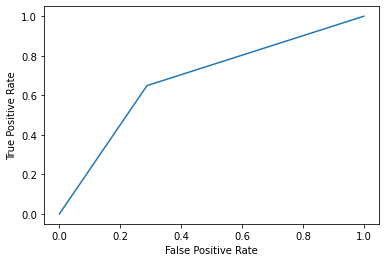

In [94]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,y_pred_dt)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Random Forest Model 

In [95]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators=100, criterion= 'entropy', random_state = 0)

In [97]:
model_RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [140]:
model_RF.score(X_train, Y_train)

0.9993306214921992

In [98]:
model_RF.score(X_test, Y_test)

0.7444398682042833

In [99]:
y_pred_RF = model_RF.predict(X_test)

In [100]:
confusion_matrix(Y_test, y_pred_RF)

array([[1983,  630],
       [ 611, 1632]], dtype=int64)

In [102]:
print("Precision: ", precision_score(Y_test, y_pred_RF))
print("Recall: ", recall_score(Y_test, y_pred_RF))

Precision:  0.7214854111405835
Recall:  0.7275969683459652


In [104]:
print(classification_report(Y_test, y_pred_RF))

              precision    recall  f1-score   support

         0.0       0.76      0.76      0.76      2613
         1.0       0.72      0.73      0.72      2243

    accuracy                           0.74      4856
   macro avg       0.74      0.74      0.74      4856
weighted avg       0.74      0.74      0.74      4856



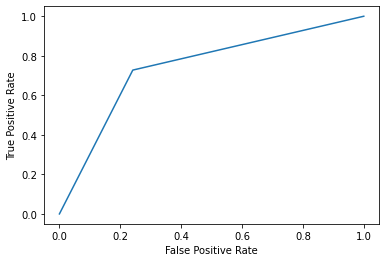

In [106]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,y_pred_RF)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting Model

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [181]:
grad_boosting_classifier = GradientBoostingClassifier(learning_rate = 0.2, max_depth = 6,n_estimators = 50)

In [182]:
grad_boosting_classifier.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=6, n_estimators=50)

In [183]:
grad_boosting_classifier.score(X_train, Y_train)

0.8143761907213841

In [184]:
grad_boosting_classifier.score(X_test, Y_test)

0.7563838550247117

In [185]:
y_pred_gbm = grad_boosting_classifier.predict(X_test)

In [186]:
confusion_matrix(y_pred_gbm, Y_test)

array([[1981,  551],
       [ 632, 1692]], dtype=int64)

In [187]:
print("Precision: ", precision_score(Y_test, y_pred_gbm))
print("Recall: ", recall_score(Y_test, y_pred_gbm))

Precision:  0.7280550774526678
Recall:  0.7543468568880963


In [188]:
print(classification_report(Y_test, y_pred_gbm))

              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77      2613
         1.0       0.73      0.75      0.74      2243

    accuracy                           0.76      4856
   macro avg       0.76      0.76      0.76      4856
weighted avg       0.76      0.76      0.76      4856



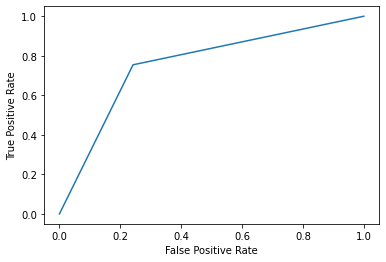

In [189]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(Y_test,y_pred_gbm)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [190]:
models = []
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBM', GradientBoostingClassifier()))

In [191]:
from sklearn import model_selection

In [192]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

DTC: 0.644193 (0.046044)
RFC: 0.722947 (0.044725)
GBM: 0.741774 (0.044296)


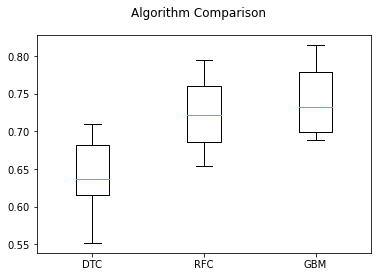

In [193]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()